**Date: 24th Aug 2021** \
**Author: Osama Sidahmed**

### Objective

The objective of this notebook is to create a classifier that differentiate between a tweet related to a real natural disaster and others that do not, using Natural language Processing (NLP) methods.

The data will be explored after which it it will be processed and then few classifiers using standard Machine learning algorithms and Deep Learning algorithms will be trained on the data to get to the best comparison using the relevant evaluation metrics.

### EDA

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# see all columns and maximum width
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

**Dataset Summary:**

This has been downloaded form [Kaggle](https://www.kaggle.com/vstepanenko/disaster-tweets). 
The description below is from the same page.

--------------
Description:

Context
The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword itself. The data structure was inherited from Disasters on social media

The tweets were collected on Jan 14th, 2020.

Some of the topics people were tweeting:

The eruption of Taal Volcano in Batangas, Philippines
Coronavirus
Bushfires in Australia
Iran downing of the airplane flight PS752

Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

Inspiration
The intention was to enrich the already available data for this topic with newly collected and manually classified tweets.
The initial source Disasters on social media which is used in Real or Not? NLP with Disaster Tweets competition on Kaggle.


---------------------------------------------------------------------

The first step is to read the csv file into a data frame and explore the dataframe different fields.

In [46]:
# read dataframe
df = pd.read_csv('data/tweets.csv', index_col='id')

In [47]:
# show dataframe
df.head()

,keyword,location,text,target
id,,,,
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…",1
1,ablaze,NaN,"Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…",1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",0


In [48]:
df.tail()

,keyword,location,text,target
id,,,,
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. This wrecked my whole night. I refuse to watch…,0
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this,0
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this https://t.co/psLBecS7hI,0
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? THOSE AU WRECKED OUR NERVES ND BRAINCELLS JDKSHSSJHS LEGENDS",0
11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


Some quick observations about the data:
- The dataframe has 11,370 tweets
- In addition to the id column that seems to be unique, the data consists of four (4) other columns, `keyword`, `location`, `text`, and `target`
- The `keyword` column seems to be in an alphabetical order
- The `location` column may not always refer to a real or a legible location or it may by Null
- The `text` column contains characters other than text and therefore may need to be curated
- The `target` column contains values 1's and 0's which may indicate 1 for real disaster and 0 for no disaster.
    
However more data exploration is required to confirm the above and to understand more about the dataset characteristics.


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 444.1+ KB


From the above, it is clear that:
- No column has Null values except for the column `location` as it has an excess of 3,000 Null instances which account of almost 25% of the data in the column, we will see later after more investigation and data exploration as to how to deal with it
- Each one of the columns has the appropriate data type

Before going further we need to check for any duplicated rows and delete them as necessary.

In [50]:
df.duplicated().any()

True

There seems to be some duplicated tweets, we need to look closer at these duplicated tweets.

In [51]:
df[df.duplicated(keep=False)]

,keyword,location,text,target
id,,,,
786,bioterror,NaN,Does the push for mass vaccination point toward a staged bioterror event? https://t.co/o10epcfRV6,0
787,bioterror,NaN,Does the push for mass vaccination point toward a staged bioterror event? https://t.co/o10epcfRV6,0
806,bioterror,United States,Does the push for vaccination point to a staged bioterror event? https://t.co/WWvKQkY1O2,0
808,bioterror,United States,Does the push for vaccination point to a staged bioterror event? https://t.co/WWvKQkY1O2,0
2054,casualty,NaN,Study? Don't you mean disinformation campaign? https://t.co/6UNSN6CzYq,0
2056,casualty,NaN,Study? Don't you mean disinformation campaign? https://t.co/6UNSN6CzYq,0
2493,collided,"jasper,texas",the planet that collided with the earth gave us the moon... at least we got something out of the deal,0
2495,collided,"jasper,texas",the planet that collided with the earth gave us the moon... at least we got something out of the deal,0
2586,collision,Isle of Man,ROAD TRAFFIC COLLISION Victoria Road Junction with Marathon Road. Road Partially Blocked. Police en route.,1


There are many exact tweets replicas that may exist for various reasons, nevertheless, as far as our classifier is concerned, these duplicates must be deleted, and this will be done next.

In [53]:
# First get the count of the duplicates
df[df.duplicated()].count()

keyword     20
location     7
text        20
target      20
dtype: int64

There are 20 duplicates.

In [54]:
df = df.drop_duplicates()

Check again if the duplicates still exist.

In [55]:
df[df.duplicated(keep=False)]

,keyword,location,text,target
id,,,,


The following also confirms that our dataframe has reduced by 20 rows in size.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11350 non-null  object
 1   location  7945 non-null   object
 2   text      11350 non-null  object
 3   target    11350 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 443.4+ KB


This is not to be confused with duplication on a a column or two where for instance two different persons tweet the same tweet but where a column such as the `location` indicates that the tweets are two different tweets posted by the same person about two different topics or possibly the same tweet text tweeted by two different people about the same topic. With the absence of the Twitter tweet id, this is not easy to confirm.

Let us now have a look at the `location` column and try to explore its content to decide on the impact of disregarding it from our analysis due to the huge amount of Null entries. 

In [79]:
# check for unique values
df['location'].nunique()

4504

In [87]:
df['location'].value_counts().head(10)

United States      95
Australia          83
London, England    81
UK                 77
India              74
London             69
United Kingdom     59
USA                52
California, USA    47
Los Angeles, CA    45
Name: location, dtype: int64

In [88]:
df['location'].value_counts().tail(10)

Here and there, hither and yon (NYC/Paris)heidi dot n dot moore at gmail dot com    1
robinsonebunu@gmail.com                                                             1
multi                                                                               1
Louisiana/Right behind you                                                          1
Snohomish County, Washington                                                        1
Royal Leamington Spa, England                                                       1
High in the mountains                                                               1
The green power rangers’ arms                                                       1
134340/ neo city                                                                    1
The actual, real, fact-based world                                                  1
Name: location, dtype: int64

There are 4,504 unique values of the `location` column out of the ~7,500 Non-Null values with `United States` on the top of the list with 95 occurrence.

This column shows "the location the tweet was sent from (may be blank)" according to the dataset owner on Kaggle. Although the data contained in this column does not appear to be homogenous, yet it appears to be holding information that has a potential to separate between classes should there was no Null values that account for ~25% of the entries. \
Now, the question is whether to remove this column all together or retain it and replace the Nan values by a default value.

It is not an easy question to answer at this stage. I will remove this column. The reason behind this is the fact that the data in this column needs huge pre-processing before being of an effective use as the information within the column is not homogenous as it was mentioned earlier.

In [91]:
# drop the column `location` from the dataframe
df = df.drop(columns='location', axis = 1)

In [93]:
# and check
df.head()

,keyword,text,target
id,,,
0,ablaze,"Communal violence in Bhainsa, Telangana. ""Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…",1
1,ablaze,"Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…",1
2,ablaze,Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI,1
3,ablaze,Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9,1
4,ablaze,"""Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",0


The dataframe is now clean and ready for pre-processing before modeling, but before that, let us do some exploration to understand more about the data content.

In [109]:
# data balance
neg_class, pos_class = round((df['target'].value_counts()/df.shape[0]) * 100, 0)
neg_class, pos_class

(81.0, 19.0)

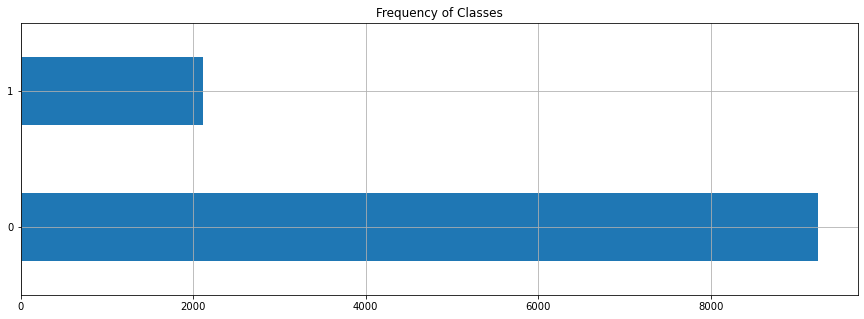

In [130]:
# visualize the class imbalance
plt.figure(figsize = (15,5))

df['target'].value_counts().plot.barh()
plt.title('Frequency of Classes')
plt.grid()

plt.show()

It is clear that the data is imbalanced with ~ 80:20 between the negative class and the positive class respectively. This is off course a problem that we need to address before we model the data as class imbalance impacts classifiers performance.

Also, it will be interesting to explore the `keyword` column more and see its related statistics and  whether is a dominant pattern.

In [132]:
df['keyword'].value_counts().count(), df['keyword'].value_counts(), 

(219,
 thunderstorm     93
 flattened        88
 stretcher        86
 mass%20murder    86
 sirens           83
                  ..
 electrocuted     16
 rainstorm        11
 deluged          10
 siren            10
 tsunami           6
 Name: keyword, Length: 219, dtype: int64)

There are 219 unique keywords on the column. Apparently, the column needs cleaning on the pre-processing stage, for instance, the value mass%20murder does not seem to be indicative unless it is curated. let us look at some random entires of the same column.

In [284]:
df.sample(5)

,keyword,text,target
id,,,
4035,detonate,#AblaNari #MohiniMondol threatened crew wid bombs strapped to her body &amp; wud detonate them any moment Anyways such #Le…,1
6095,hailstorm,Sir I heard your company looking for car name ( Mahindra Hailstorm and mahindra Shred),0
1111,blizzard,I became lost in a Himalayan blizzard at 4000 meters and was saved by a horse. https://t.co/DGP7RNeiv6,1
2749,crush,yo i kinda jus wanna kiss my crush there i said it,0
1947,bush%20fires,are offering 2 people the chance to WIN a 3-night stay at their bush home in South Africa. Every $20… https://t.co/5QXFjSZzvR,0


The column is mostly one word, but sometimes the entry consists of two words (bi-grams) stuck together with the character set `%20` in between. some examples:
- emergency%20services	
- forest%20fire
- body%20bag \
etc..

In [217]:
print(f'The number of these bigrams in the keyword column is {df[df["keyword"].str.contains("%20")].count()[0]} \
entries out of {df.shape[0]} entries in the dataframe.') 

The number of these bigrams is 1819 entries out of 11350 entries in the dataframe.


The above off course includes all duplicated entries.

In [257]:
print(f'The maximum and minimum string length in the text column are \
{max(df["text"].str.len()), min(df["text"].str.len())} respectively.')

The maximum and minimum string length in the text column are (149, 5) respectively.


Looking at the distribution of the string length, we get:

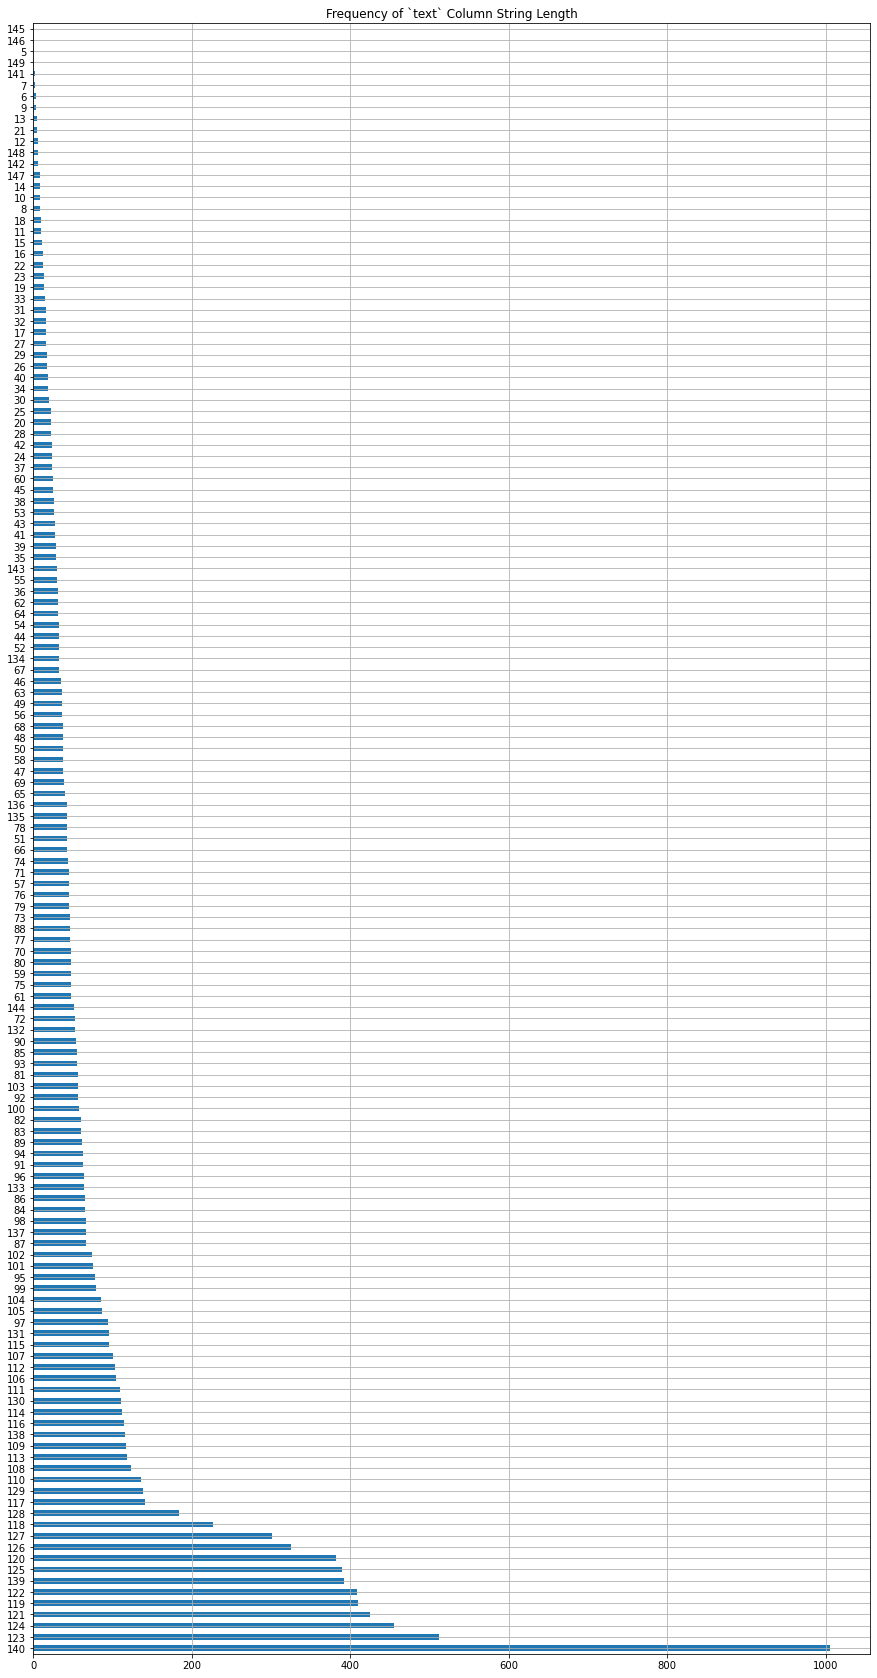

In [268]:
# visualize the `text` Column String Length
plt.figure(figsize = (15,30))

df['text'].str.len().value_counts().plot.barh()
plt.title('Frequency of `text` Column String Length')
plt.grid()

plt.show()

It seems that string length of a big part of the entries lay around 120 characters. What is the impact of this?

We can also see explore the same column for the hash-tags (#) and the URLs. 

In [287]:
print(f'The number of the entries in the `text` column with URLs is {df[df["text"].str.contains("http")].count()[0]} \
entries out of {df.shape[0]} entries in the dataframe.') 

The number of the entries in the `text` column with URLs is 5495 entries out of 11350 entries in the dataframe.


In [289]:
print(f'The number of the entries in the `text` column with hash-tags is {df[df["text"].str.contains("#")].count()[0]} \
entries out of {df.shape[0]} entries in the dataframe.') 

The number of the entries in the `text` column with hash-tags is 1529 entries out of 11350 entries in the dataframe.


It is the clear that more than half of the entries of the `text` column include some sort of a URL/link.

The removal of these characters if any will done in the preprocessing phase, for now we can say that the data is ready for pre-pre-processing.

-----------------------------------

### Pre-prcessing

### Modelling